# PSO (Particle Swarm Optimization)

## Sumber

https://github.com/ljvmiranda921/pyswarms

https://medium.com/analytics-vidhya/implementing-particle-swarm-optimization-pso-algorithm-in-python-9efc2eb179a6

## Tentang PSO

Ada banyak definisi AI. Menurut kamus Merrian-Webster, Kecerdasan Buatan adalah area luas ilmu komputer yang mensimulasikan perilaku cerdas di komputer. Berdasarkan hal tersebut, implementasi algoritma berbasis metaheuristik yang disebut Particle Swarm Optimization (awalnya diusulkan untuk mensimulasikan burung yang mencari makanan, pergerakan kawanan ikan, dll.) mampu mensimulasikan perilaku kawanan untuk mengoptimalkan masalah numerik secara iteratif.Ini dapat diklasifikasikan sebagai algoritma kecerdasan swarm seperti Algoritma Koloni Semut, Algoritma Koloni Lebah Buatan dan Pencarian Bakteri, misalnya.

Diusulkan pada tahun 1995 oleh J. Kennedy dan R.Eberhart, artikel “Particle Swarm Optimization” menjadi sangat populer karena proses optimasinya yang berkelanjutan memungkinkan variasi ke banyak target dan banyak lagi. Terdiri dari pencarian konstan solusi terbaik, metode ini memindahkan partikel (dalam hal ini direpresentasikan sebagai posisi (x,y)) dengan kecepatan tertentu yang dihitung dalam setiap iterasi. Setiap gerakan partikel memiliki pengaruhnya sendiri terhadap posisi yang paling dikenal dan juga posisi yang paling dikenal dalam pencarian ruang angkasa. Hasil akhir yang diharapkan adalah partikel swarm konvergen menjadi solusi terbaik. Penting untuk diketahui bahwa PSO tidak menggunakan Gradient Descent, sehingga dapat digunakan untuk masalah non linier karena tidak memerlukan masalah yang harus didiferensiasikan.

## Algoritma

!["algoritma"](https://miro.medium.com/max/1400/1*zLmYH2QiwttYcjUMhvKWcA.png)

Pada awalnya, dalam perulangan 2 for, ini menginisialisasi posisi partikel dengan distribusi seragam acak dalam rentang yang diizinkan untuk semua dimensinya (Beberapa masalah memerlukan penanganan ke beberapa dimensi). Setelah itu, untuk setiap partikel, ia menghitung nilai fitnessnya dan dibandingkan dengan posisi terbaiknya sendiri (Nilai p_best adalah posisi terbaik dari partikel tertentu yang pernah ada) dan kemudian memilih posisi terbaik dari semua partikel di g_best.

Mari kita lihat lebih dekat persamaan yang mendefinisikan kecepatan iterasi berikutnya dari dimensi partikel:
- Vᵢ(k+1) adalah kecepatan iterasi berikutnya
- W adalah parameter inersia. Parameter ini mempengaruhi propagasi gerakan yang diberikan oleh nilai kecepatan terakhir.
- C₁ dan C adalah koefisien percepatan. Nilai C₁ memberikan pentingnya nilai terbaik pribadi dan C₂ adalah pentingnya nilai terbaik sosial.
- Pᵢ adalah posisi individu terbaik dan Pg adalah posisi terbaik dari semua partikel. Dalam persamaan tersebut, diukur jarak masing-masing parameter tersebut terhadap posisi partikel yang sebenarnya.
- rand₁ dan rand₂ adalah bilangan acak di mana 0 rand 1 dan mereka mengontrol pengaruh masing-masing nilai: Sosial dan individu seperti yang ditunjukkan di bawah ini.

!["loop"](https://miro.medium.com/max/700/1*Y1DFdUEBX3vVeuZVpM11fA.png)

## Coding

### Import

In [1]:
import pyswarms as ps
import numpy as np
from pyswarms.utils.plotters import plot_cost_history, plot_contour, plot_surface
import matplotlib.pyplot as plt
import os
import imageio
import math

### Fungsi Objective

In [2]:
def f(_x):
    "Objective function"
    
    x = _x[:, 0]
    y = _x[:, 1]
    
    return (x-3.14)**2 + (y-2.72)**2 + np.sin(3*x+1.41) + np.sin(4*y-1.73)

### Optimalization

2021-10-27 17:56:04,212 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.1, 'c2': 0.1, 'w': 0.8}
pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████|100/100, best_cost=-1.81
2021-10-27 17:56:04,588 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -1.8083520358405483, best pos: [3.18515166 3.12980363]


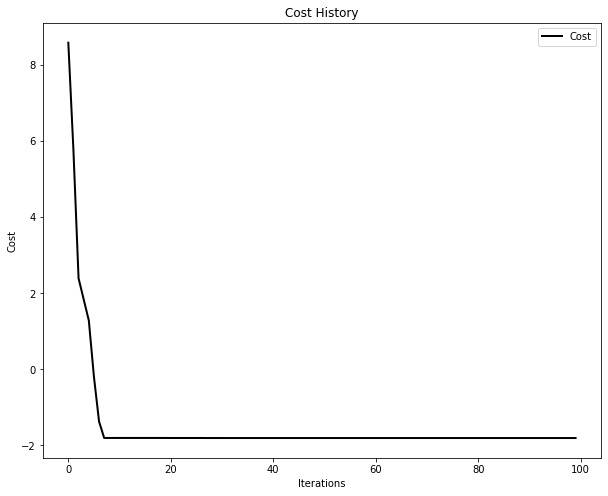

In [3]:
options = {'c1':0.1, 'c2':0.1, 'w':0.8}
optimizer = ps.single.GlobalBestPSO(n_particles=20, dimensions=2, options=options)
best_cost, best_pos = optimizer.optimize(f, iters=100)
# Plot the cost
plot_cost_history(optimizer.cost_history)
plt.show()

In [4]:
best_pos

array([3.18515166, 3.12980363])

Dengan ini, kita mendapatkan posisi terbaik adalah [3.18515916 3.12980206]

In [5]:
minX = minY = maxX = maxY = 0
for particles in optimizer.pos_history:
    for particle in particles:
        if particle[0] > maxX:
            maxX = particle[0]
        if particle[0] < minX:
            minX = particle[0]
            
        if particle[1] > maxY:
            maxY = particle[0]
        if particle[1] < minY:
            minY = particle[0]

minX = math.floor(minX)
maxX = math.ceil(maxX)

minY = math.floor(minY)
maxY = math.ceil(maxY)

In [6]:
def getXY(data):
    x = []
    y = []
    for i in data:
        x.append(i[0])
        y.append(i[1])
    return x, y

### Visualisasi

In [7]:
folder_name = "plots_other_version"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
l = len(optimizer.pos_history)
gif_name = "PSO_other_version.gif"

filenames = []
for i in range(l):
    x, y = getXY(optimizer.pos_history[i])
    plt.scatter(x, y, color="blue", alpha=0.5)
    plt.scatter(best_pos[0], best_pos[1], color="red", alpha=0.5)
    plt.xlim(minX, maxX)
    plt.ylim(minY, maxY)
    
    # plt.show()
    filename = f'{folder_name}/{i}.png'
    filenames.append(filename)
    
    # save frame
    plt.savefig(filename)
    plt.close()    
    
# build gif
with imageio.get_writer(gif_name, mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        

![SegmentLocal](PSO_other_version.gif "segment")